# Monte Carlo Simulation and Random Walk Generation

$$  \frac{ S_{1+dt} - S_t}{S_t} = \mu dt + \sigma \sqrt {dt} \xi_t $$

In [1]:
import numpy as np
import pandas as pd

def gbm(n_years =10, n_scenarios = 1000, mu=0.07,sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Evolution of a Stock Price using Geometric Browian Motion Model (Monte Carlo Simulation)
    """
    dt = 1/steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc= (1+mu*dt),scale = (sigma*np.sqrt(dt)),size = (n_steps, n_scenarios), )
    rets_plus_1[0] = 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

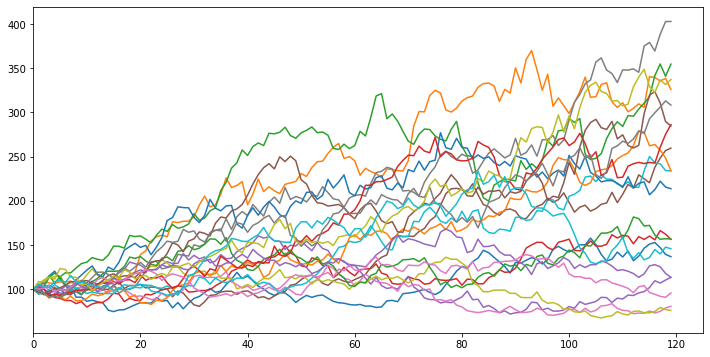

In [2]:
import ashmodule as ash
ax = gbm(n_scenarios = 20).plot(legend = False,figsize = (12,6));
ax.set_xlim(left = 0);

In [3]:
gbm(n_scenarios = 10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.915021,98.288020,97.964553,100.630102,100.962604,102.704944,101.918746,97.995114,100.948230,104.184327
2,105.723580,99.248582,106.977899,98.659657,102.871749,99.268144,102.570936,99.827444,100.548886,111.303821
3,107.682129,106.564699,108.307436,107.559958,94.486343,103.196218,91.032210,98.792867,96.677184,113.309726
4,106.746838,110.140753,104.520783,114.954149,89.844298,102.704321,85.848939,101.248478,97.997185,108.802585


In [4]:
%load_ext autoreload
%autoreload 2

# Using IPyWidget to Interact Plotting the Monte Carlo Simulation

In [5]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt


In [13]:

def show_gbm(n_scenarios=1000, mu=0.07, sigma=0.15, s_0=100.0):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    """
    s_0=s_0
    prices = gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha = 0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, ls=":", color="black")
    # draw a dot at the origin
    ax.plot(0,s_0, marker='o',color='darkred', alpha=0.2)

    


In [14]:
gbm_controls = widgets.interactive(ash.show_gbm,
                                   n_scenarios = widgets.IntSlider(min=1,max=1000,step=5),
                                   mu =(-0.3,0.3,0.05),
                                   sigma =(0,0.5,0.01),
                                   s_0 =(1,500,10)
                                  )
display(gbm_controls)

interactive(children=(IntSlider(value=1, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(valu…

# Using IPyWidgets to interact with Monte Carlo Simulations and CPPI

In [96]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0.0, riskfree_rate=0.03, y_max=100,s_0=100, steps_per_year = 12):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = s_0
    sim_rets = ash.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = ash.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["risky_r"]
    # calculate terminal wealth stats
    y_max=wealth.values.max()*y_max/100
    ax = wealth.plot(legend = False, alpha = 0.3, color = "indianred", figsize = (12,6))
    ax.axhline(y=start, ls=":", color= "black")
    ax.axhline(y=start*floor, ls="--",color = "red")
    ax.set_ylim(top=y_max)


In [97]:
cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., +.2, .01),
                                   sigma=(0, .30, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
                                   )



In [98]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [73]:
r_asset = ash.gbm(n_scenarios=50)
r_asset

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,93.477498,104.742468,99.092915,110.400564,100.432837,102.606596,102.384871,95.521298,99.116444,98.887161,...,95.405515,100.009491,96.670548,112.640656,97.518257,96.082667,107.934592,101.073938,98.291137,103.325787
2,88.617769,99.663195,101.999169,112.462030,101.595365,107.157463,107.164725,95.373582,99.396656,85.576069,...,102.274048,99.205897,100.814306,112.470347,94.610416,101.517757,112.956689,105.252318,98.226035,107.411445
3,89.559826,103.750149,104.432843,105.488374,108.212018,120.964922,109.851791,102.530059,109.568555,89.629912,...,98.492061,99.993663,104.825902,117.396016,93.725938,100.301774,110.922459,105.524978,107.278129,113.961831
4,96.625799,106.199735,111.519600,112.341725,108.997864,111.488064,106.487568,112.883407,106.671002,86.829772,...,103.166462,101.719959,108.371819,113.033606,95.464455,99.785996,111.643309,100.116180,106.261343,108.394042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,108.258472,376.699858,117.898663,354.794038,239.778615,61.751251,244.474890,196.246717,81.148815,153.240428,...,281.003430,207.191126,95.740442,204.569477,132.450666,85.730653,209.317609,91.299325,480.021027,151.082772
117,110.768723,384.607558,107.697965,367.591528,230.647497,66.823252,247.702738,202.280119,86.774219,147.292961,...,287.921927,210.463945,95.174202,211.569161,125.939349,82.636541,227.815817,97.562567,489.672739,142.327098
118,107.991493,407.212143,99.659501,344.554209,229.931410,67.583685,270.487908,210.077143,82.819860,154.670501,...,293.307860,200.909327,97.315334,209.861951,138.601208,86.384917,238.323252,105.869898,520.868617,139.073473
119,109.672015,382.049499,100.483314,350.091878,247.932445,69.043326,278.900537,205.106068,93.399821,152.093091,...,283.055917,198.496608,92.872135,216.813908,135.829841,89.179811,248.020542,99.450270,499.922433,134.161882


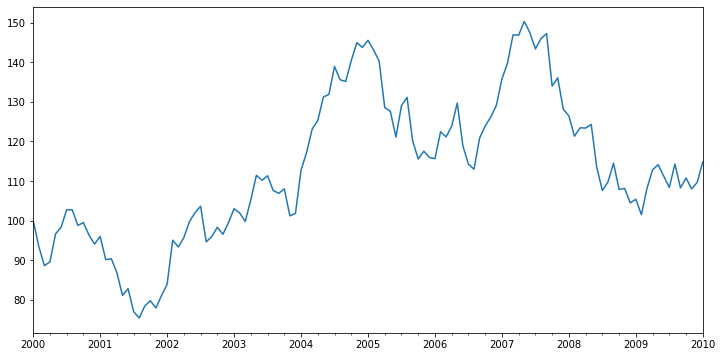

In [95]:
ash.run_cppi((r_asset))["risky_r"][0].plot(legend=False,figsize =(12,6))

In [75]:
ash.run_cppi(r_asset,start = 100)["Wealth"].head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,...,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03,6.100100e+03
1,5.763222e+05,6.450396e+05,6.105768e+05,6.795546e+05,6.187505e+05,6.320106e+05,6.306581e+05,5.887896e+05,6.107203e+05,6.093217e+05,...,5.880833e+05,6.161680e+05,5.958001e+05,6.932194e+05,6.009712e+05,5.922140e+05,6.645119e+05,6.226612e+05,6.056859e+05,6.363977e+05
2,5.164871e+07,6.493175e+07,6.288890e+07,7.710364e+07,6.348093e+07,6.835666e+07,6.821496e+07,5.674376e+07,6.131428e+07,5.275267e+07,...,6.073374e+07,6.174367e+07,6.066097e+07,7.865984e+07,5.745911e+07,6.071245e+07,7.572558e+07,6.615920e+07,6.009981e+07,6.899280e+07
3,4.677298e+09,6.801611e+09,6.630556e+09,8.210641e+09,6.932880e+09,8.337115e+09,7.561750e+09,5.874685e+09,6.779431e+09,4.780970e+09,...,6.042525e+09,6.235719e+09,6.419502e+09,9.313012e+09,5.442868e+09,6.150279e+09,8.475393e+09,7.047607e+09,6.507495e+09,7.931538e+09
4,4.566250e+11,7.291308e+11,7.460675e+11,9.306083e+11,7.626020e+11,9.378259e+11,8.127941e+11,6.690291e+11,7.299481e+11,4.199115e+11,...,6.294285e+11,6.405328e+11,7.021126e+11,1.061996e+12,5.250433e+11,6.198620e+11,9.546963e+11,7.126271e+11,6.980026e+11,8.676630e+11


In [71]:
r_asset.shape

(121, 50)

In [79]:
r_asset.index = pd.date_range("2000-01",periods=r_asset.shape[0],freq="MS").to_period("M")

In [80]:
r_asset.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2000-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2000-02,93.477498,104.742468,99.092915,110.400564,100.432837,102.606596,102.384871,95.521298,99.116444,98.887161,...,95.405515,100.009491,96.670548,112.640656,97.518257,96.082667,107.934592,101.073938,98.291137,103.325787
2000-03,88.617769,99.663195,101.999169,112.462030,101.595365,107.157463,107.164725,95.373582,99.396656,85.576069,...,102.274048,99.205897,100.814306,112.470347,94.610416,101.517757,112.956689,105.252318,98.226035,107.411445
2000-04,89.559826,103.750149,104.432843,105.488374,108.212018,120.964922,109.851791,102.530059,109.568555,89.629912,...,98.492061,99.993663,104.825902,117.396016,93.725938,100.301774,110.922459,105.524978,107.278129,113.961831
2000-05,96.625799,106.199735,111.519600,112.341725,108.997864,111.488064,106.487568,112.883407,106.671002,86.829772,...,103.166462,101.719959,108.371819,113.033606,95.464455,99.785996,111.643309,100.116180,106.261343,108.394042


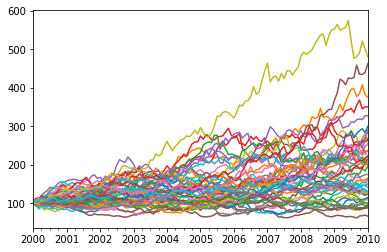

In [94]:
ash.run_cppi(r_asset,start = 100)["risky_r"].plot(legend = False);

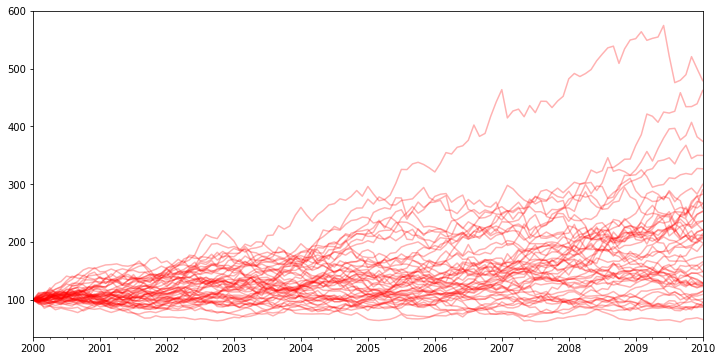

In [100]:
ash.run_cppi(r_asset,start = 100)["risky_r"].plot(legend = False,figsize = (12,6),color= "red", alpha = 0.3);

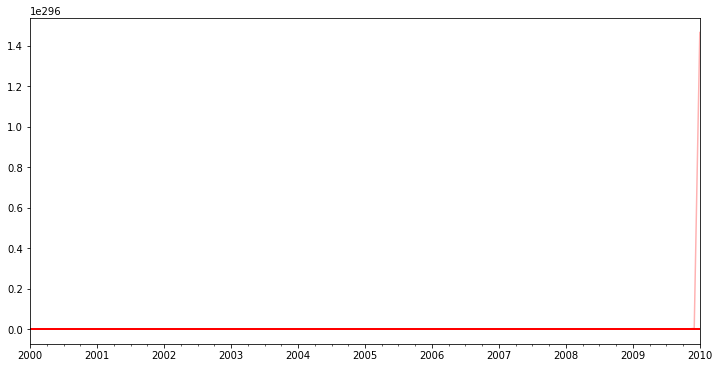

In [101]:
ash.run_cppi(r_asset,start = 100)["Wealth"].plot(legend = False,figsize = (12,6),color= "red", alpha = 0.3);

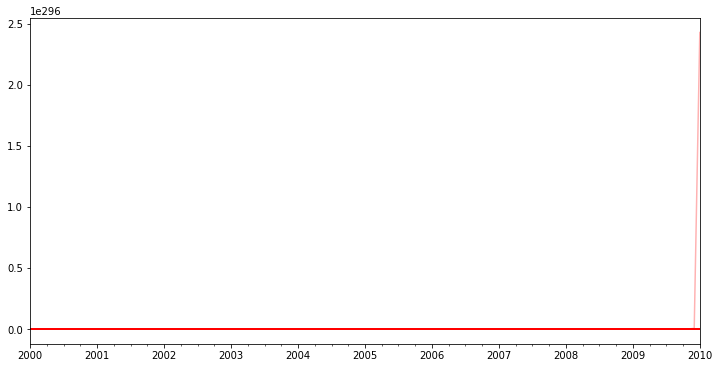

In [104]:
ash.run_cppi(r_asset,start = 100)["Risky Wealth"].plot(legend = False,figsize = (12,6),color= "red", alpha = 0.3);

In [105]:
r_asset = ash.gbm(n_scenarios=50)
r_asset.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,104.272096,91.054679,104.854839,97.552421,105.848658,100.226550,98.485104,105.375758,106.156718,93.724321,...,101.186731,102.229212,99.259815,93.610360,102.384208,105.754436,94.208360,98.342555,98.594580,97.349033
2,104.340928,96.752495,107.753842,95.358607,112.889970,104.828167,96.204068,111.368219,106.694394,95.283856,...,104.549404,95.561523,96.385913,97.738546,99.349789,113.213168,90.969468,97.680697,104.881440,93.976205
3,108.159977,104.716419,108.985124,94.349774,110.991314,111.894518,96.869047,111.220456,103.910709,99.533899,...,102.323552,97.489160,94.157169,96.523183,101.033935,112.054125,100.127729,99.138203,104.482513,94.223883
4,111.733655,100.292404,106.760184,91.173795,115.251615,116.453854,93.260141,119.814954,94.280898,100.604911,...,108.208276,89.736802,94.529686,89.365825,98.834589,105.143756,97.179521,93.415432,104.266608,95.526290


In [106]:
r_asset.index = pd.date_range("2000-01",periods=r_asset.shape[0],freq="MS").to_period("M")

In [107]:
r_asset.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2000-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2000-02,104.272096,91.054679,104.854839,97.552421,105.848658,100.226550,98.485104,105.375758,106.156718,93.724321,...,101.186731,102.229212,99.259815,93.610360,102.384208,105.754436,94.208360,98.342555,98.594580,97.349033
2000-03,104.340928,96.752495,107.753842,95.358607,112.889970,104.828167,96.204068,111.368219,106.694394,95.283856,...,104.549404,95.561523,96.385913,97.738546,99.349789,113.213168,90.969468,97.680697,104.881440,93.976205
2000-04,108.159977,104.716419,108.985124,94.349774,110.991314,111.894518,96.869047,111.220456,103.910709,99.533899,...,102.323552,97.489160,94.157169,96.523183,101.033935,112.054125,100.127729,99.138203,104.482513,94.223883
2000-05,111.733655,100.292404,106.760184,91.173795,115.251615,116.453854,93.260141,119.814954,94.280898,100.604911,...,108.208276,89.736802,94.529686,89.365825,98.834589,105.143756,97.179521,93.415432,104.266608,95.526290


In [122]:
r_asset.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
2000-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2000-02,104.272096,91.054679,104.854839,97.552421,105.848658,100.226550,98.485104,105.375758,106.156718,93.724321,...,101.186731,102.229212,99.259815,93.610360,102.384208,105.754436,94.208360,98.342555,98.594580,97.349033
2000-03,104.340928,96.752495,107.753842,95.358607,112.889970,104.828167,96.204068,111.368219,106.694394,95.283856,...,104.549404,95.561523,96.385913,97.738546,99.349789,113.213168,90.969468,97.680697,104.881440,93.976205
2000-04,108.159977,104.716419,108.985124,94.349774,110.991314,111.894518,96.869047,111.220456,103.910709,99.533899,...,102.323552,97.489160,94.157169,96.523183,101.033935,112.054125,100.127729,99.138203,104.482513,94.223883
2000-05,111.733655,100.292404,106.760184,91.173795,115.251615,116.453854,93.260141,119.814954,94.280898,100.604911,...,108.208276,89.736802,94.529686,89.365825,98.834589,105.143756,97.179521,93.415432,104.266608,95.526290


In [124]:
r_asset[0]

2000-01    100.000000
2000-02    104.272096
2000-03    104.340928
2000-04    108.159977
2000-05    111.733655
              ...    
2009-09    187.028748
2009-10    186.600331
2009-11    190.044544
2009-12    193.694459
2010-01    198.490654
Freq: M, Name: 0, Length: 121, dtype: float64

In [152]:
ash.run_cppi(pd.DataFrame(r_asset[10]),start = 1000, floor = 0.8)

{'Wealth':                     10
 2000-01   6.100100e+04
 2000-02   5.707089e+06
 2000-03   4.999453e+08
 2000-04   4.157527e+10
 2000-05   3.741977e+12
 ...                ...
 2009-09  3.195207e+239
 2009-10  5.001859e+241
 2009-11  8.208110e+243
 2009-12  1.289649e+246
 2010-01  1.908371e+248
 
 [121 rows x 1 columns],
 'Risky Wealth':                     10
 2000-01   1.010000e+05
 2000-02   9.449287e+06
 2000-03   8.277647e+08
 2000-04   6.883661e+10
 2000-05   6.195631e+12
 ...                ...
 2009-09  5.290338e+239
 2009-10  8.281631e+241
 2009-11  1.359025e+244
 2009-12  2.135286e+246
 2010-01  3.159711e+248
 
 [121 rows x 1 columns],
 'Risk Budget':           10
 2000-01  0.6
 2000-02  1.0
 2000-03  1.0
 2000-04  1.0
 2000-05  1.0
 ...      ...
 2009-09  1.0
 2009-10  1.0
 2009-11  1.0
 2009-12  1.0
 2010-01  1.0
 
 [121 rows x 1 columns],
 'm': 3,
 'start': 1000,
 'floor':             10
 2000-01  800.0
 2000-02  800.0
 2000-03  800.0
 2000-04  800.0
 2000-05  800.0
 ...